In [ ]:
import os, sys, subprocess

REPO = "https://github.com/jongmoonha/Signal_Processing_Practice.git"
DIR  = "Signal_Processing_Practice"

try:
    import google.colab  # Colab 전용 모듈
    if not os.path.isdir(DIR):
        subprocess.run(["git","clone",REPO], check=True)
    print('We are in Google Colab environment.')
    os.chdir('/content/'+DIR)
    print('Current working directory:', os.getcwd())

except ImportError:
    print('We are in a local environment, not Google Colab.')
    pass

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
import pandas as pd
from scipy.signal import hilbert
import scipy.stats as stats
import utils
plt.rc('font', size=12)

In [3]:
from Functions import kurtogram # Copyright (c) 2015, Jerome Antoni

# 데이터 로드

## 베어링 주파수 DB 만들기

In [4]:
rpm = 1772
F_shaft = rpm/60
print('Shaft Frequency is', F_shaft)

DE_BPFI, DE_BPFO = 5.4152*F_shaft, 3.5848*F_shaft
print('DE Inner Race Fault Frequency: ', DE_BPFI)
print('DE Outer Race Fault Frequency: ', DE_BPFO)

FE_BPFI, FE_BPFO = 4.9469*F_shaft, 3.0530*F_shaft
print('FE Inner Race Fault Frequency: ', FE_BPFI)
print('FE Outer Race Fault Frequency: ', FE_BPFO)

Shaft Frequency is 29.533333333333335
DE Inner Race Fault Frequency:  159.92890666666668
DE Outer Race Fault Frequency:  105.87109333333333
FE Inner Race Fault Frequency:  146.0984466666667
FE Outer Race Fault Frequency:  90.16526666666667


## Load Data

In [5]:
fs=12000
data = np.array(pd.read_csv('./data/data_normal.csv'))
v_n = data[:,1]

data = np.array(pd.read_csv('./data/data_fault_DE_IR.csv'))
y = data[:,1]
T = len(y) / fs
t = np.arange(1/fs, T + 1/fs, 1/fs)

Text(0, 0.5, '|Y|')

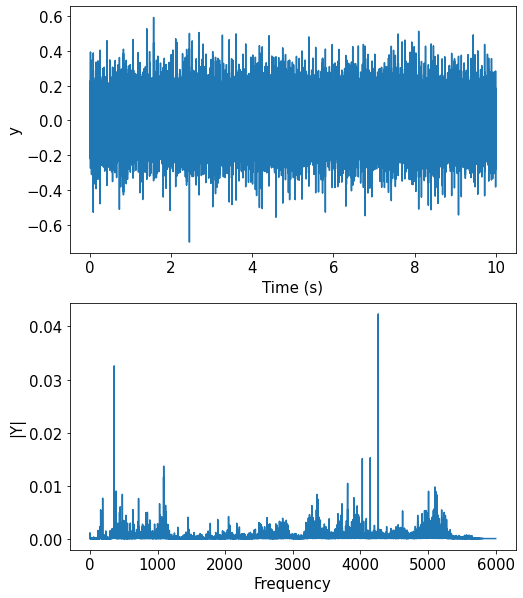

In [6]:
f_filter, A_filter = utils.fft_simple(y,fs)

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(t,y);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212)
plt.plot(f_filter,A_filter);plt.xlabel('Frequency');plt.ylabel('|Y|')

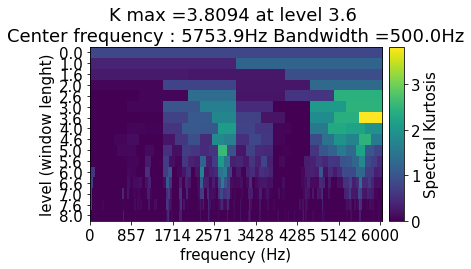

In [7]:
Kwav, Level_w, freq_w, c, max_Kurt, bandwidth, level_max = kurtogram.fast_kurtogram(y, fs, nlevel=8)     # Center frequency & bandwidth obtained from kurtogram
minw = np.where(Level_w == level_max)[0][0]
kurtw = np.where(Kwav[minw, :] == max_Kurt)[0][0]
bandw = freq_w[kurtw]
ax = plt.gca()
im = ax.imshow(Kwav, interpolation='none', aspect='auto')
xlavel = np.array(np.arange(0, fs/2+fs/2/7, fs/2/7), dtype=int)
plt.xticks(np.arange(0, Kwav.shape[1], Kwav.shape[1] // 7), labels=xlavel)
plt.title(f'K max ={max_Kurt:.4f} at level {level_max:.1f} '
          f'\nCenter frequency : {bandw + bandwidth/2:.1f}Hz Bandwidth ={bandwidth:.1f}Hz')
plt.xlabel('frequency (Hz)')
plt.yticks(np.arange(0, Kwav.shape[0], 1), labels=np.round(Level_w, 1))
plt.ylabel('level (window lenght)')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)
plt.ylabel('Spectral Kurtosis')
plt.tight_layout()

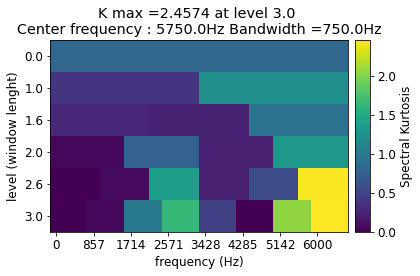

In [16]:
Kwav, Level_w, freq_w, c, max_Kurt, bandwidth, level_max = kurtogram.fast_kurtogram(y, fs, nlevel=3)     # Center frequency & bandwidth obtained from kurtogram
minw = np.where(Level_w == level_max)[0][0]
kurtw = np.where(Kwav[minw, :] == max_Kurt)[0][0]
bandw = freq_w[kurtw]
ax = plt.gca()
im = ax.imshow(Kwav, interpolation='none', aspect='auto')
xlavel = np.array(np.arange(0, fs/2+fs/2/7, fs/2/7), dtype=int)
plt.xticks(np.arange(0, Kwav.shape[1], Kwav.shape[1] // 7), labels=xlavel)
plt.title(f'K max ={max_Kurt:.4f} at level {level_max:.1f} '
          f'\nCenter frequency : {bandw + bandwidth/2:.1f}Hz Bandwidth ={bandwidth:.1f}Hz')
plt.xlabel('frequency (Hz)')
plt.yticks(np.arange(0, Kwav.shape[0], 1), labels=np.round(Level_w, 1))
plt.ylabel('level (window lenght)')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)
plt.ylabel('Spectral Kurtosis')
plt.tight_layout()

In [9]:
ftype='band'
b1 = bandw
b2 = bandw+bandwidth

if b2>fs/2:
    b2 = fs/2-1
    
Wn=np.array([b1, b2])
print(Wn)
v_filter = utils.filtering(y, fs, Wn, ftype)

[5503.90625 5999.     ]


Text(0, 0.5, '|Y|')

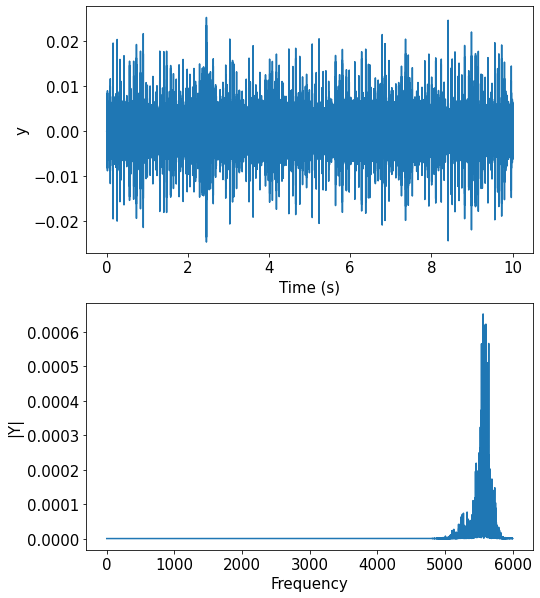

In [10]:
f_filter, A_filter = utils.fft_simple(v_filter,fs)

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(t,v_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212)
plt.plot(f_filter,A_filter);plt.xlabel('Frequency');plt.ylabel('|Y|')

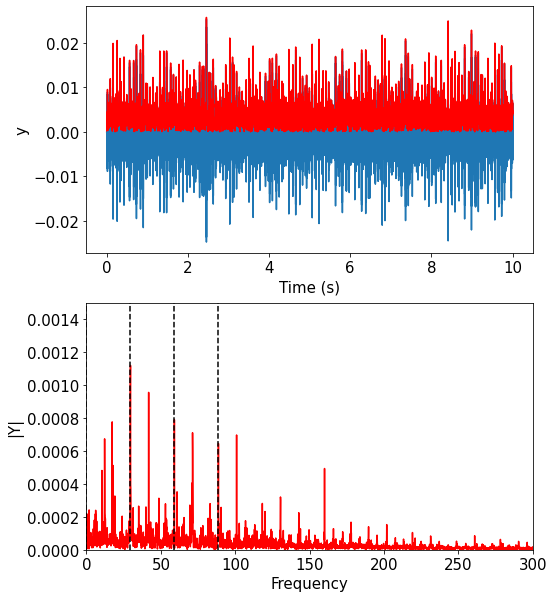

In [11]:
v_filter_env = abs(hilbert(v_filter,axis=0))
[f_filter_env, A_filter_env] = utils.fft_simple(v_filter_env-np.mean(v_filter_env),fs);

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(t,v_filter);plt.xlabel('Time (s)');plt.ylabel('y')
plt.plot(t,v_filter_env,'r')

plt.subplot(212)
plt.plot(f_filter_env,A_filter_env,'r');plt.xlabel('Frequency');plt.ylabel('|Y|')

plt.axis([0,300,0,0.0015])

for n in range(4):
    plt.axvline(n*F_shaft, color='k', linestyle='dashed')


131.42221518826656


Text(0, 0.5, '|Y|')

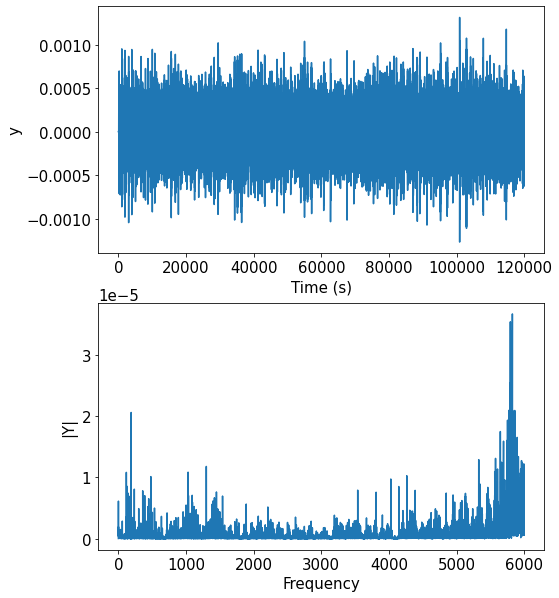

In [12]:
FilterSize = 100
_, y_MED = utils.MEDA(y, FilterSize=FilterSize, remain=True)
print(stats.kurtosis(y_MED))

f_MED, A_MED = utils.fft_simple(y_MED,fs)

y_MED[0:FilterSize]=0

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(y_MED);plt.xlabel('Time (s)');plt.ylabel('y')
plt.subplot(212)
plt.plot(f_MED,A_MED);plt.xlabel('Frequency');plt.ylabel('|Y|')

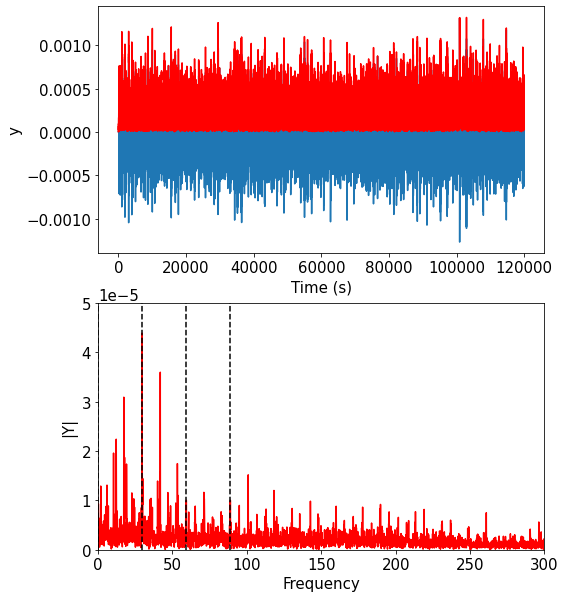

In [13]:
v_MED_env = abs(hilbert(y_MED,axis=0))
[f_MED_env, A_MED_env] = utils.fft_simple(v_MED_env-np.mean(v_MED_env),fs);

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.plot(y_MED);plt.xlabel('Time (s)');plt.ylabel('y')
plt.plot(v_MED_env,'r')

plt.subplot(212)
plt.plot(f_MED_env,A_MED_env,'r');plt.xlabel('Frequency');plt.ylabel('|Y|')

plt.axis([0,300,0,0.00005])

for n in range(4):
    plt.axvline(n*F_shaft, color='k', linestyle='dashed')
